In [24]:
%%markdown
# Data Engineering 

# Data Engineering 


In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 
import seaborn as sns 
import sklearn as skl
from imblearn.over_sampling import SMOTE
from scipy.stats import norm 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings('ignore') 
%matplotlib inline 

In [2]:
data = pd.read_csv('created_data/feature_engineered_data.csv')
data.head()

,Income,Monthly Premium Auto,Total Claim Amount,Coverage_1,Coverage_2,Education_1,Education_2,Education_3,Education_4,EmploymentStatus_1,...,Renew Offer Type_2,Renew Offer Type_3,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Vehicle Class_5,Vehicle Size_1,Vehicle Size_2,Response
0,0.612827,-0.703925,-0.169640,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,-1.239617,0.022691,2.400737,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0.365710,0.429596,0.455734,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,-1.239617,0.371467,0.329769,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.203390,-0.587666,-1.018843,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


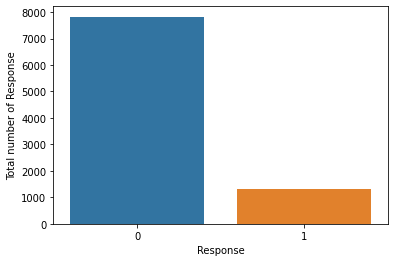

In [26]:
ax = sns.countplot('Response',data = data)
plt.ylabel('Total number of Response')
plt.show()

In [6]:
%%markdown

### Since there is a significant difference in the number of people who responded vs those who did not, it is necessary for us to over sample the number of people who responded. 

### This is important to avoid the generalization of the overasampled class(0) by ML models. Since the oversampled class makes up for the majority of the data, ML models will tend to be biased towards that class during prediction. 


### Since there is a significant difference in the number of people who responded vs those who did not, it is necessary for us to over sample the number of people who responded. 

### This is important to avoid the generalization of the overasampled class(0) by ML models. Since the oversampled class makes up for the majority of the data, ML models will tend to be biased towards that class during prediction. 


In [3]:
X = data.drop(['Response'],axis= 1)
y = data['Response']

In [4]:
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  
# describes info about train and test set 
print("Shape of X_train dataset: ", X_train.shape) 
print("Shape of y_train dataset: ", y_train.shape) 
print("Shape of X_test dataset: ", X_test.shape) 
print("Shape of y_test dataset: ", y_test.shape) 

Shape of X_train dataset:  (6393, 35)
Shape of y_train dataset:  (6393,)
Shape of X_test dataset:  (2741, 35)
Shape of y_test dataset:  (2741,)


In [27]:
%%markdown
### Performing a Logistic Regression before Oversampling. 

### Performing a Logistic Regression before Oversampling. 


In [10]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2323
           1       0.75      0.15      0.25       418

    accuracy                           0.86      2741
   macro avg       0.81      0.57      0.59      2741
weighted avg       0.85      0.86      0.82      2741



In [29]:
%%markdown
### We notice a very low recall for Class 1. 

### We notice a very low recall for Class 1. 


In [5]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))



Before OverSampling, counts of label '1': 890
Before OverSampling, counts of label '0': 5503 



In [7]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (11006, 35)
After OverSampling, the shape of train_y: (11006,) 

After OverSampling, counts of label '1': 5503
After OverSampling, counts of label '0': 5503


In [ ]:
%%markdown
### Performing a Logistic Regression after Oversampling. 

In [9]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2323
           1       0.35      0.46      0.40       418

    accuracy                           0.79      2741
   macro avg       0.62      0.65      0.64      2741
weighted avg       0.81      0.79      0.80      2741



In [30]:
%%markdown
### While the recall has improved, the precision has dropped. We will have to work towards fixing this issue. 

### While the recall has improved, the precision has dropped. We will have to work towards fixing this issue. 
